# 4.6 Results for ECA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

from src.transfer_matrix import *
from utils.rules import *
from utils.experiments import *

import matplotlib.colors as mcolors

plt.rcParams.update({'backend': 'pdf', 'font.size': 14, 'font.family': 'serif', 'text.latex.preamble': r'\usepackage{gensymb}',  'savefig.format':'pdf', 
                     'lines.linewidth': 2, 'lines.markersize':10, 'lines.markeredgewidth':2, 'figure.constrained_layout.w_pad': 2, 'figure.autolayout' : True})

List of the Wolfram numbers of the nonequivalent ECA rules and their Wolfram classification:

In [2]:
rules=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 50, 51, 54, 56, 57, 58, 60, 62, 72, 73, 74, 76, 77, 78, 90, 94, 104, 105, 106, 108, 110, 122, 126, 128, 130, 132, 134, 136, 138, 140, 142, 146, 150, 152, 154, 156, 160, 162, 164, 168, 170, 172, 178, 184, 200, 204, 232]

In [3]:
Wolfram_class=[1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,[2,3],2,[2,3],2,2,2,2,2,2,2,3,1,2,2,2,2,2,2,1,2,2,2,2,3,2,2,2,[2,4],2,2,2,2,2,1,[3,4],2,2,2,2,2,2,1,2,3,1,4,[2,3],[2,3],1,2,2,2,1,2,2,2,[2,3],2,2,[2,3],2,1,2,2,1,2,2,2,2,1,2,1]

In [4]:
d=[2]
mu_list=[0]
df_RS=rs_calculation(rule_list=[wolfram_to_new_notation(i) for i in rules], d_list=d, mu_list=mu_list, tol=1e-12, max_iter=10000, damping_parameter=0.95)

 11%|█████████▎                                                                        | 10/88 [00:01<00:09,  7.99it/s]

No convergence for rule 6 ! Final error: 2.557154601198783e-07


 20%|████████████████▊                                                                 | 18/88 [00:02<00:08,  8.36it/s]

No convergence for rule 14 ! Final error: 2.544134513154878e-07


 33%|███████████████████████████                                                       | 29/88 [00:03<00:06,  8.52it/s]

No convergence for rule 28 ! Final error: 4.950754006050809e-07


 62%|███████████████████████████████████████████████████▎                              | 55/88 [00:05<00:03,  9.58it/s]

No convergence for rule 74 ! Final error: 2.4622239685062643e-07


 75%|█████████████████████████████████████████████████████████████▌                    | 66/88 [00:05<00:01, 17.77it/s]

No convergence for rule 134 ! Final error: 4.25991921376693e-07


 81%|██████████████████████████████████████████████████████████████████▏               | 71/88 [00:07<00:02,  5.90it/s]

No convergence for rule 136 ! Final error: 1.9947324843500383e-07
No convergence for rule 142 ! Final error: 2.1333832645138925e-07

 83%|████████████████████████████████████████████████████████████████████              | 73/88 [00:08<00:03,  4.45it/s]

 85%|█████████████████████████████████████████████████████████████████████▉            | 75/88 [00:08<00:03,  3.78it/s]

No convergence for rule 152 ! Final error: 6.763080041171869e-07


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 83/88 [00:10<00:01,  4.48it/s]

No convergence for rule 156 ! Final error: 9.750443169022468e-07
No convergence for rule 168 ! Final error: 2.1579234456628026e-07


100%|██████████████████████████████████████████████████████████████████████████████████| 88/88 [00:11<00:00,  7.56it/s]

No convergence for rule 184 ! Final error: 4.48355345314014e-07


In [5]:
density_TM=[]
entropy_TM=[]
free_entropy_TM=[]
mu_list_=[0]
for rule in rules:
    density, entropy, free_entropy=transfer_matrix_density_entropy(rule_array=wolfram_number_to_binary(rule), mu_list=mu_list_)
    density_TM.append(density)
    entropy_TM.append(entropy)
    free_entropy_TM.append(free_entropy)

C:\Users\user\OneDrive\EPFL\travail de master\Playground CA\src\transfer_matrix.py:23: RuntimeWarning: divide by zero encountered in log
  return np.log(max(eig.real))


In [6]:
free_entropy_TM=[el[0] for el in free_entropy_TM]

In [7]:
dic={'rule': rules, 'Wolfram class': Wolfram_class, 'Free entropy RS': df_RS['free_entropy'].tolist(), 'Free entropy TM': free_entropy_TM}

In [8]:
df=pd.DataFrame(dic)

In [9]:
df.round(5)

,rule,Wolfram class,Free entropy RS,Free entropy TM
0,0,1,0.00000,0.00000
1,1,2,-25.03074,-inf
2,2,2,-0.00000,0.00000
3,3,2,-26.04654,-inf
4,4,2,0.48121,0.48121
...,...,...,...,...
83,178,2,0.00000,0.00000
84,184,2,0.00192,0.00000
85,200,1,0.56240,0.56240
86,204,2,0.69315,0.69315


In [10]:
# Printing the table: 
print(df.round(5).to_latex(longtable=False, caption='ECA, their Wolfram classification and their free entropy from BP and transfer matrix calculation.', index=False))

## Free entropy as function of the Wolfram classes

In [11]:
Wolfram_class=[1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,3,2,3,2,2,2,2,2,2,2,3,1,2,2,2,2,2,2,1,2,2,2,2,3,2,2,2,4,2,2,2,2,2,1,4,2,2,2,2,2,2,1,2,3,1,4,3,3,1,2,2,2,1,2,2,2,3,2,2,3,2,1,2,2,1,2,2,2,2,1,2,1]

In [12]:
Wolfram_mult_classes_rules=[18,22, 54, 73, 122, 126, 146, 154]
Wolfram_mult_classes=[2,2,2,3,2,2,2,2]

In [13]:
ECA_classification_matrix=[[],[],[],[]]
for i,rule in enumerate(rules):
    ECA_classification_matrix[Wolfram_class[i]-1].append(rule)
for i, rule in enumerate(Wolfram_mult_classes_rules):
    ECA_classification_matrix[Wolfram_mult_classes[i]-1].append(rule)    

In [14]:
ECA_entropy_matrix=ECA_classification_matrix
for i in range(4):
    for j,rule in enumerate(ECA_classification_matrix[i]):
        ECA_entropy_matrix[i][j]=free_entropy_TM[rules.index(rule)]

In [15]:
np.maximum([1,2,3,-2],-1)

array([ 1,  2,  3, -1])

In [16]:
unique_1, counts_1=np.unique(np.maximum(ECA_entropy_matrix[0],-0.2).round(10), return_counts=True)
unique_2, counts_2=np.unique(np.maximum(ECA_entropy_matrix[1],-0.2).round(10), return_counts=True)
unique_3, counts_3=np.unique(np.maximum(ECA_entropy_matrix[2],-0.2).round(10), return_counts=True)
unique_4, counts_4=np.unique(np.maximum(ECA_entropy_matrix[3],-0.2).round(10), return_counts=True)

<ipython-input-17-3e546687ec17>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(a)


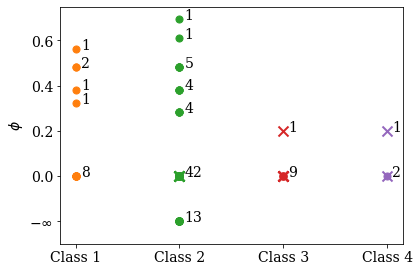

In [17]:
fig, ax=plt.subplots()
colors=list(mcolors.TABLEAU_COLORS)
for i, Wclass in enumerate(Wolfram_class):
    if rules[i] not in Wolfram_mult_classes_rules:
        ax.scatter(Wclass, free_entropy_TM[i] if free_entropy_TM[i]>-1 else -0.2, color=colors[Wclass], s=50)
    else:
        ax.scatter(Wclass, free_entropy_TM[i] if free_entropy_TM[i]>-1 else -0.2, color=colors[Wclass], marker='x')
for i, Wclass in enumerate(Wolfram_mult_classes):
    idx=rules.index(Wolfram_mult_classes_rules[i])
    ax.scatter(Wclass, free_entropy_TM[idx] if free_entropy_TM[idx]>-1 else -0.2, color=colors[Wclass], marker='x')
for i, counts in enumerate(counts_1):
    ax.text(1+0.05, unique_1[i], counts)
for i, counts in enumerate(counts_2):
    ax.text(2+0.05, unique_2[i], counts)
for i, counts in enumerate(counts_3):
    ax.text(3+0.05, unique_3[i], counts)
for i, counts in enumerate(counts_4):
    ax.text(4+0.05, unique_4[i], counts)
ax.set_ylabel(r'$\phi$')
ax.set_title

a=ax.get_yticks().tolist()
a[1]='$-\infty$'
a[3]=0.2
ax.set_yticklabels(a)
ax.set_ylim([-0.3,0.75])

ax.set_xticks([1,2,3,4], ['Class 1', 'Class 2', 'Class 3', 'Class 4']);

fig.savefig('figures\phi_vs_classification_ECA.pdf')